In [1]:
import os                   # to interact with the operating system
import glob

import numpy as np
import pandas as pd
import xarray as xr

import pop_tools
import gsw                  # compute potential density

import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
import cmocean.cm as cmo
import matplotlib.ticker as ticker


from matplotlib import animation, gridspec

In [2]:
# setting up of regional mask
grid_name = 'POP_gx1v7'
region_defs = {
    'North Atlantic and Nordic Seas': [{'match': {'REGION_MASK': [6, 7, 9]}, 
                             'bounds': {'TLAT': [20., 78.]}}],
    'LabradorSea': [{'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [45.0, 66.0]}}]
} 
mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs, mask_name='North Atlantic and Nordic Seas')
mask3d = mask3d.sum('region')

def find_corresponding_number(vvel_filename):
    with open(os.path.expanduser('~/phase1_CONDA/timeseries/order.txt'), 'r') as file:
        vvel_list = file.readlines()
    vvel_dict = {filename.split()[1]: int(filename.split()[0]) for filename in vvel_list}
    vvel_number_to_find = None
    for filename in vvel_list:
        if filename.split()[1] == vvel_filename:
            vvel_number_to_find = vvel_dict[filename.split()[1]]
            break
    return vvel_number_to_find

def find_corresponding_file_name(vvel_number_to_find):
    with open(os.path.expanduser('~/phase1_CONDA/timeseries/order.txt'), 'r') as file:
        vvel_list = file.readlines()
    vvel_dict = {filename.split()[1]: int(filename.split()[0]) for filename in vvel_list}
    vvel_filename = None
    for filename in vvel_list:
        if vvel_dict[filename.split()[1]] == vvel_number_to_find:
            vvel_filename = filename.split()[1]  
            break
    return vvel_filename

# Load data from 'events_dens_spg.csv' into a NumPy array.
data = np.genfromtxt('events_dens_spg.csv', delimiter=',', names=True, dtype=None)

# Accessing columns by name
member_numbers = data['Index']
events = data['Values']
member_names = []

for i in range(len(member_numbers)):
    member_names.append(find_corresponding_file_name(member_numbers[i])[5:])

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


# Plot Composites

In [3]:
ccrs = cartopy.crs

### N_HEAT

In [4]:
n_heat_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/n_heat_anomaly.nc'
difference_n_heat = xr.open_dataset(n_heat_file)

vmin = -abs(difference_n_heat.N_HEAT).max()
vmax = abs(difference_n_heat.N_HEAT).max()

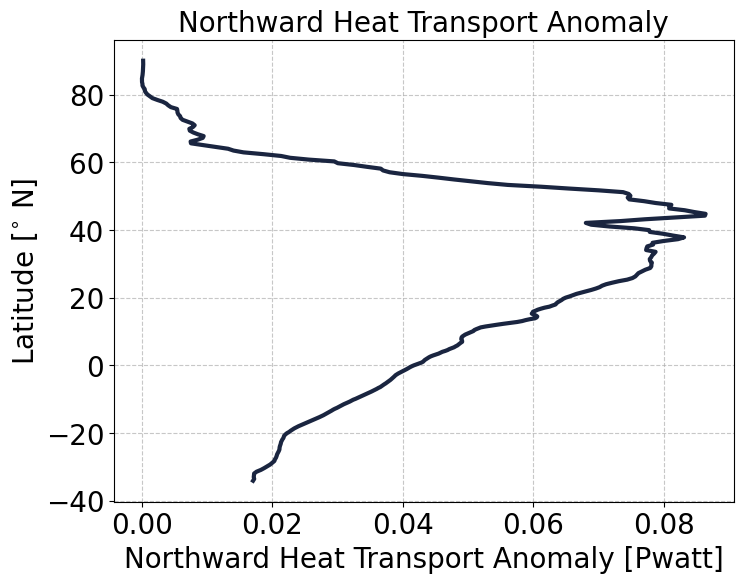

In [6]:
labelsize = 20

line = difference_n_heat.N_HEAT.values
lats = difference_n_heat.lat_aux_grid.values

plt.figure(figsize=(8, 6))
plt.plot(line, lats, linewidth=3, color='#1A2540')
plt.title('Northward Heat Transport Anomaly', fontsize=labelsize)
plt.xlabel('Northward Heat Transport Anomaly [Pwatt]', fontsize=labelsize)
plt.ylabel('Latitude [$^{\circ}$ N]', fontsize=labelsize)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)

#plt.show()
plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'n_heat_anomaly.png', bbox_inches='tight', dpi=300)

In [10]:
n_heat_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/N_HEATcomposite.nc'
difference_n_heat = xr.open_dataset(n_heat_file)

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [9]:
bsf_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/N_HEATcomposite.nc'
ds_var_annual = xr.open_dataarray(bsf_file)

ds = ds_var_annual - ds_var_annual.isel(time=0)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

lats = difference_n_heat.lat_aux_grid.values

# Loop through the subplots and plot the data
for i, ax in enumerate(axes.flatten()):
    
    line = ds.isel(time=range(i * 5, i * 5 + 5)).mean('time').values
    
    ax.plot(line, lats)

        # Set xlim and ylim
    ax.set_xlim(-0.03, 0.15)

    ax.set_title(f" {i+1}")

fig.suptitle('sMOC -  5 year Anomalies', fontsize=16)

plt.show()

#plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'n_heat_5year_anomalies.png', bbox_inches='tight', dpi=300)

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

### AICE

In [ ]:
aice_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/aice/aice_1001.001.nc'
difference_aice = xr.open_dataset(aice_file)

In [ ]:
difference_aice

In [ ]:
# Assuming ds is your xarray dataset
ice_area = difference_aice.aice.isel(time=0).roll(ni=-100) # Adjust the variable name accordingly
time_index = 0  # Adjust the time index as needed

# Create a binary mask where True indicates values greater than or equal to 0.15
mask = ice_area >= 0.15


# Plot the map with the 15% ice coverage indicated by a line
fig, ax = plt.subplots()


horiz_sigma_plot = difference_bsf.plot(ax=ax, cmap=cmap, add_colorbar=False)#, vmin=vmin_sigma, vmax=vmax_sigma)

#ice_area.plot(ax=ax, cmap='Blues', add_colorbar=False)
mask.plot.contour(ax=ax, colors=['gray'], linewidths=1)

plt.xlim([167, 310])
plt.ylim([256, 384])

plt.title(f'15% Ice Coverage')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

### BSF

In [11]:
bsf_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/BSF_anomaly.nc'
difference_bsf = xr.open_dataarray(bsf_file)

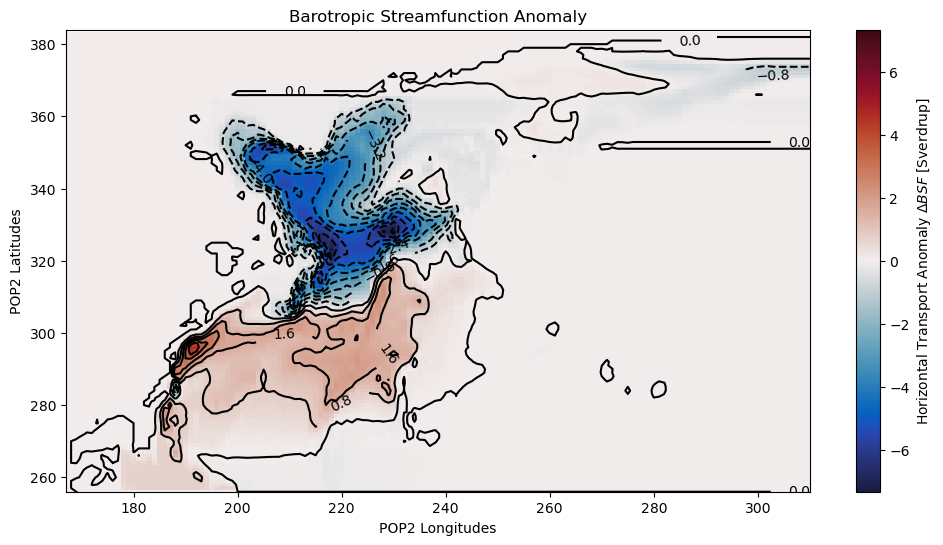

In [12]:
field = difference_bsf

cmap = cmo.balance
#cmap.set_bad('gray')

plt.figure(figsize=(12, 6))
horiz_sigma_plot = field.plot(cmap=cmap, add_colorbar=False)#, vmin=vmin_sigma, vmax=vmax_sigma)
contour_sigma = field.plot.contour(colors='k', levels=21, add_colorbar=False) 
plt.clabel(contour_sigma, inline=True, fontsize=10)

plt.xlim([167, 310])
plt.ylim([256, 384])

plt.ylabel('POP2 Latitudes')
plt.xlabel('POP2 Longitudes')
plt.title('Barotropic Streamfunction Anomaly')

cbar = plt.colorbar(horiz_sigma_plot)
cbar.set_label('Horizontal Transport Anomaly $\Delta BSF$ [Sverdrup]')  # Add your colorbar label here

#plt.show()
plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'BSF_anomaly.png', bbox_inches='tight', dpi=300)

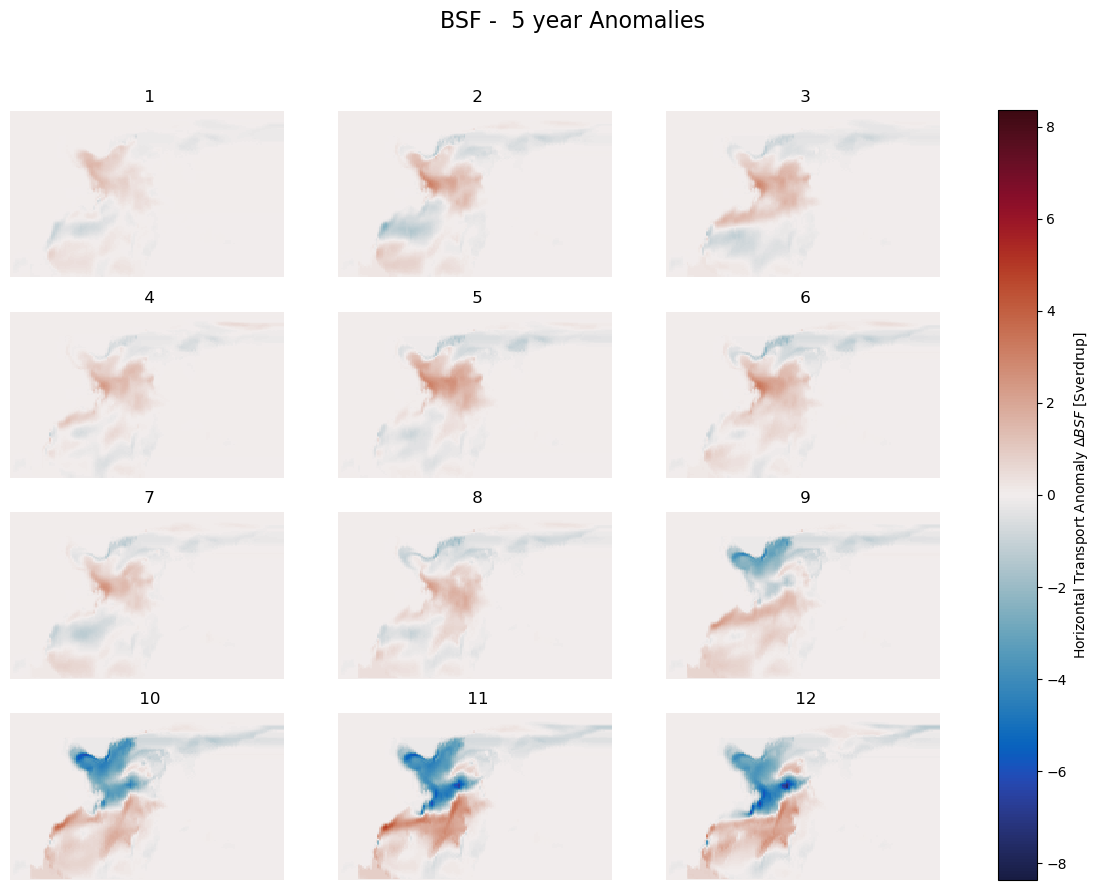

In [13]:
bsf_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/BSFcomposite.nc'
ds_var_annual = xr.open_dataarray(bsf_file)

ds = ds_var_annual - ds_var_annual.isel(time=0)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Set common xlim and ylim for all plots
common_xlim = (167, 310)
common_ylim = (256, 384)

vmin, vmax = -abs(ds).max(), abs(ds).max()

# Loop through the subplots and plot the data
for i, ax in enumerate(axes.flatten()):
    # Plot data without colorbar
    plot = ds.isel(time=range(i * 5, i * 5 + 5)).mean('time').plot(ax=ax, add_colorbar=False, vmin=vmin, vmax=vmax, cmap=cmap)
    ax.set_axis_off()

    # Set xlim and ylim
    ax.set_xlim(common_xlim)
    ax.set_ylim(common_ylim)

    ax.set_title(f" {i+1}")

# Add a single colorbar for all plots outside the loop
cbar = fig.colorbar(plot, ax=axes, orientation='vertical', label='Horizontal Transport Anomaly $\Delta BSF$ [Sverdrup]')

fig.suptitle('BSF -  5 year Anomalies', fontsize=16)

#plt.show()

plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'BSF_5year_anomalies.png', bbox_inches='tight', dpi=300)

### DEPTH MOC

In [12]:
dmoc_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/dMOC_anomaly.nc'
difference_dmoc = xr.open_dataarray(dmoc_file)

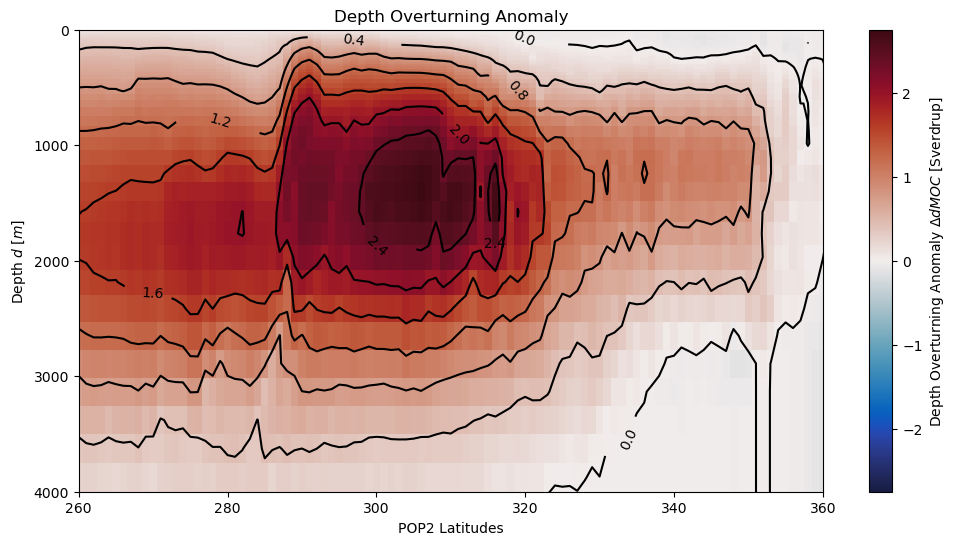

In [24]:
field = difference_dmoc

cmap = cmo.balance
cmap.set_bad('gray')

plt.figure(figsize=(12, 6))
horiz_sigma_plot = field.plot(cmap=cmap, yincrease = False, add_colorbar=False)
contour_sigma = field.plot.contour(colors='k', yincrease = False, levels=19, add_colorbar=False) 
plt.clabel(contour_sigma, inline=True, fontsize=10)

plt.xlim([260, 360])
plt.ylim([400000, 0])

current_y_ticks = plt.yticks()[0]
new_y_ticks = np.array(current_y_ticks)[::2]  # Take every second tick
new_y_tick_labels = ['{:g}'.format(float(tick) * 1e-2) for tick in new_y_ticks]
plt.yticks(new_y_ticks, new_y_tick_labels)

plt.ylabel(r'Depth $d$ [$m$]')
plt.xlabel('POP2 Latitudes')
plt.title('Depth Overturning Anomaly')

cbar = plt.colorbar(horiz_sigma_plot)
cbar.set_label('Depth Overturning Anomaly $\Delta dMOC$ [Sverdrup]')  

#plt.show()
plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'dMOC_anomaly.png', bbox_inches='tight', dpi=300)

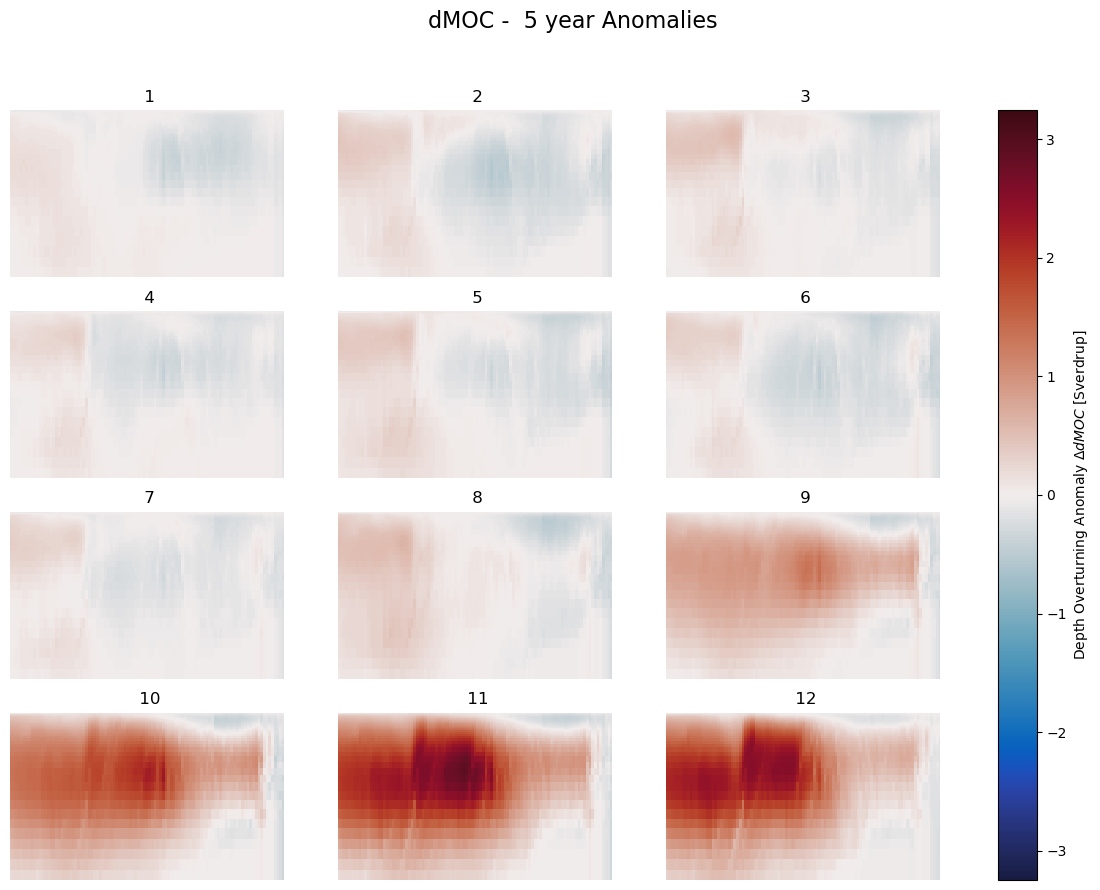

In [38]:
bsf_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/dMOCcomposite.nc'
ds_var_annual = xr.open_dataarray(bsf_file)

ds = ds_var_annual - ds_var_annual.isel(time=0)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Set common xlim and ylim for all plots
common_xlim = (260, 360)
common_ylim = (400000, 0)

vmin, vmax = -abs(ds).max(), abs(ds).max()

# Loop through the subplots and plot the data
for i, ax in enumerate(axes.flatten()):
    # Plot data without colorbar
    plot = ds.isel(time=range(i * 5, i * 5 + 5)).mean('time').plot(ax=ax, add_colorbar=False, vmin=vmin, vmax=vmax, cmap=cmap)
    ax.set_axis_off()

    # Set xlim and ylim
    ax.set_xlim(common_xlim)
    ax.set_ylim(common_ylim)
    
    current_y_ticks = plt.yticks()[0]
    new_y_ticks = np.array(current_y_ticks)[::2]  # Take every second tick
    new_y_tick_labels = ['{:g}'.format(float(tick) * 1e-2) for tick in new_y_ticks]
    plt.yticks(new_y_ticks, new_y_tick_labels)

    ax.set_title(f" {i+1}")

# Add a single colorbar for all plots outside the loop
cbar = fig.colorbar(plot, ax=axes, orientation='vertical', label='Depth Overturning Anomaly $\Delta dMOC$ [Sverdrup]')

fig.suptitle('dMOC -  5 year Anomalies', fontsize=16)

#plt.show()

plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'dMOC_5year_anomalies.png', bbox_inches='tight', dpi=300)

### DENSITY MOC

In [18]:
smoc_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/sMOC_anomaly.nc'
difference_smoc = xr.open_dataarray(smoc_file)

In [19]:
field = difference_smoc

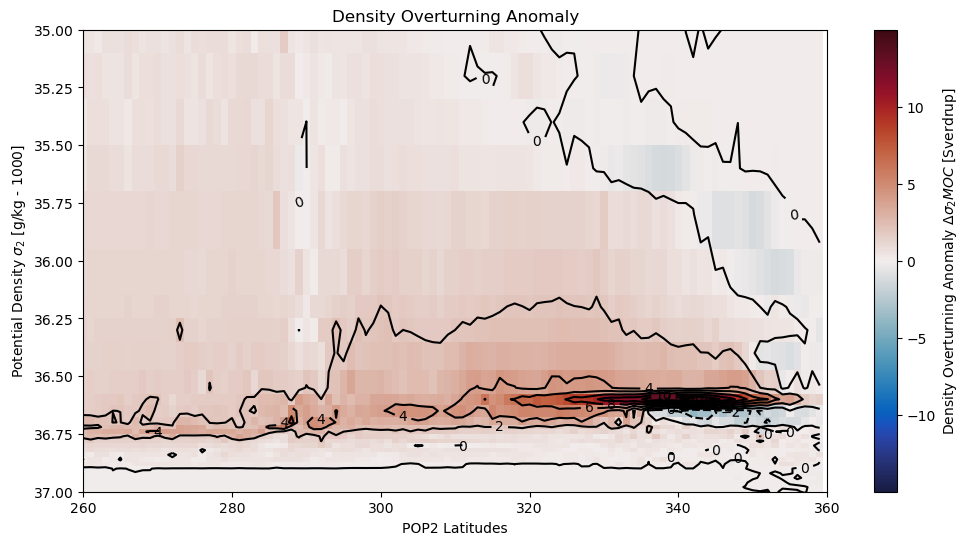

In [22]:
cmap = cmo.balance
cmap.set_bad('gray')

plt.figure(figsize=(12, 6))
horiz_sigma_plot = field.plot(cmap=cmap, add_colorbar = False)#, vmin=vmin_sigma, vmax=vmax_sigma)
contour_sigma = field.plot.contour(colors='k', levels=19, add_colorbar = False) 
plt.clabel(contour_sigma, inline=True, fontsize=10)


plt.xlim([260, 360])
plt.ylim([37, 35])

plt.ylabel(r'Potential Density $\sigma_2$ [g/kg - 1000]')
plt.xlabel('POP2 Latitudes')
plt.title('Density Overturning Anomaly')

cbar = plt.colorbar(horiz_sigma_plot)
cbar.set_label('Density Overturning Anomaly $\Delta \sigma_2 MOC$ [Sverdrup]')  

#plt.show()
plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'sMOC_anomaly.png', bbox_inches='tight', dpi=300)

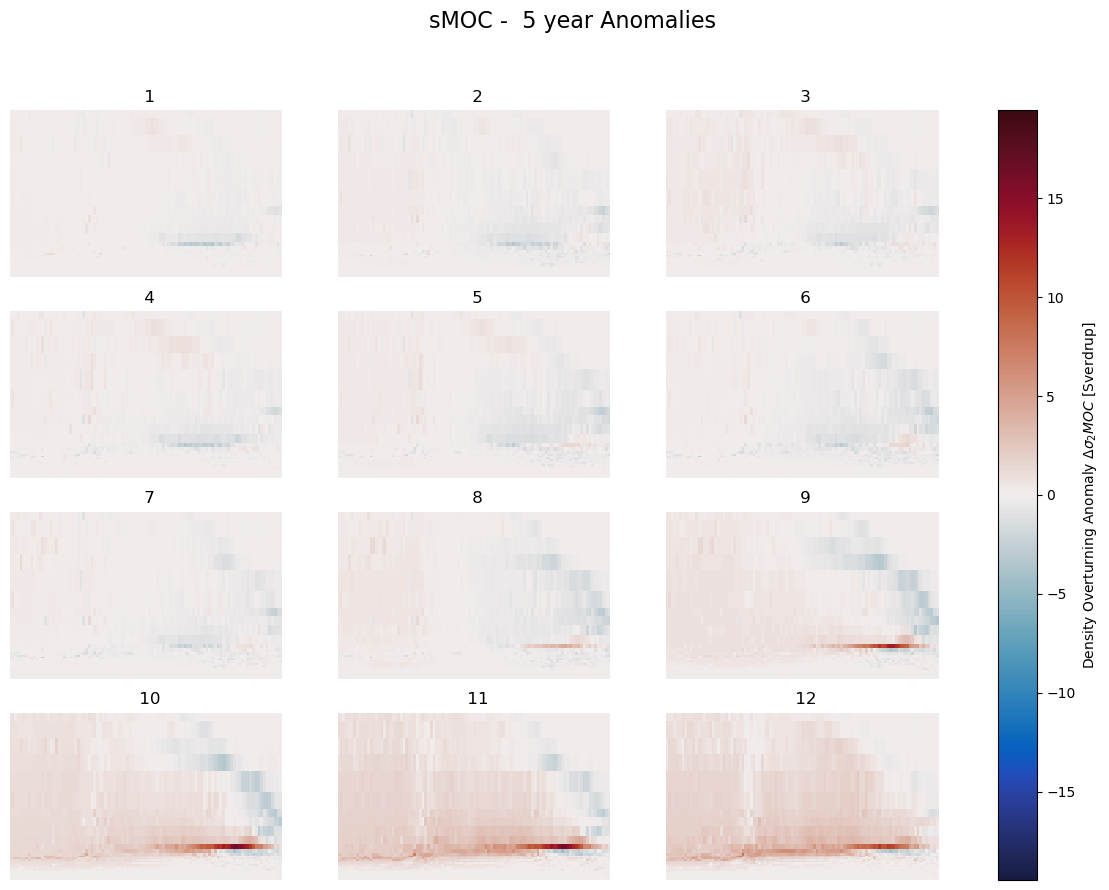

In [28]:
bsf_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/sMOCcomposite.nc'
ds_var_annual = xr.open_dataarray(bsf_file)

ds = ds_var_annual - ds_var_annual.isel(time=0)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Set common xlim and ylim for all plots
common_xlim = (260, 360)
common_ylim = (37, 35)

vmin, vmax = -abs(ds).max(), abs(ds).max()

# Loop through the subplots and plot the data
for i, ax in enumerate(axes.flatten()):
    # Plot data without colorbar
    plot = ds.isel(time=range(i * 5, i * 5 + 5)).mean('time').plot(ax=ax, add_colorbar=False, vmin=vmin, vmax=vmax, cmap=cmap)
    ax.set_axis_off()

    # Set xlim and ylim
    ax.set_xlim(common_xlim)
    ax.set_ylim(common_ylim)

    ax.set_title(f" {i+1}")

# Add a single colorbar for all plots outside the loop
cbar = fig.colorbar(plot, ax=axes, orientation='vertical', label='Density Overturning Anomaly $\Delta \sigma_2 MOC$ [Sverdrup]')

fig.suptitle('sMOC -  5 year Anomalies', fontsize=16)

#plt.show()

plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'sMOC_5year_anomalies.png', bbox_inches='tight', dpi=300)

### DENS

In [3]:
sigma_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/sigma_anomaly.nc'
difference_sigma = xr.open_dataset(sigma_file)
vmin = -abs(difference_sigma.SIGMA_2).max()
vmax = abs(difference_sigma.SIGMA_2).max()

Text(0.5, 1.0, '0-1000 meters Density Anomaly')

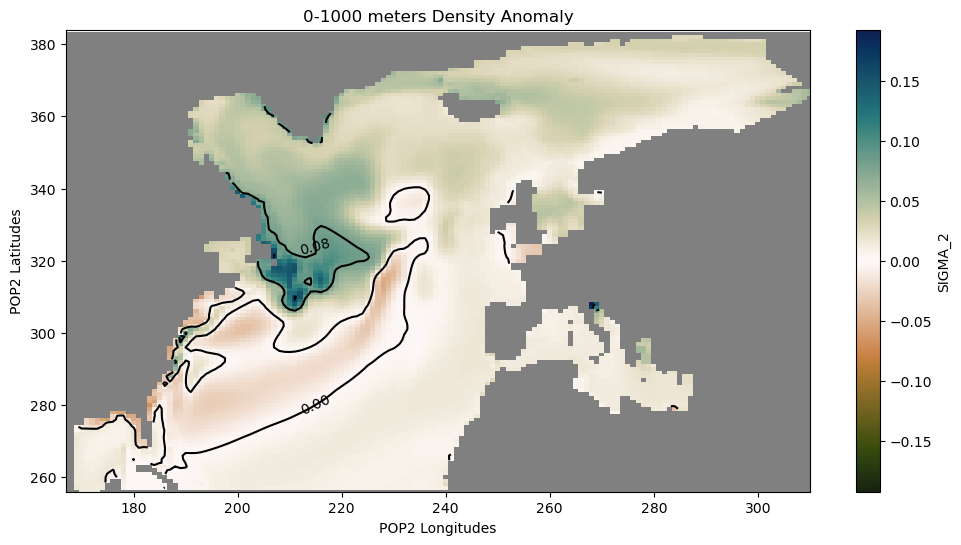

In [4]:
field = difference_sigma.SIGMA_2.sel(z_t=slice(5.0000000e+02, 8.7882523e+04)).mean('z_t')

cmap = cmo.tarn
cmap.set_bad('gray')

plt.figure(figsize=(12, 6))
horiz_sigma_plot = field.plot(cmap=cmo.tarn)#, vmin=vmin_sigma, vmax=vmax_sigma)
contour_sigma = field.plot.contour(colors='k') 
plt.clabel(contour_sigma, inline=False, fontsize=10)

plt.xlim([167, 310])
plt.ylim([256, 384])
plt.ylabel('POP2 Latitudes')
plt.xlabel('POP2 Longitudes')
plt.title('0-1000 meters Density Anomaly')
plt.show()

#### latitudinal section

In [5]:
cmap = cmo.tarn
cmap.set_bad('gray')

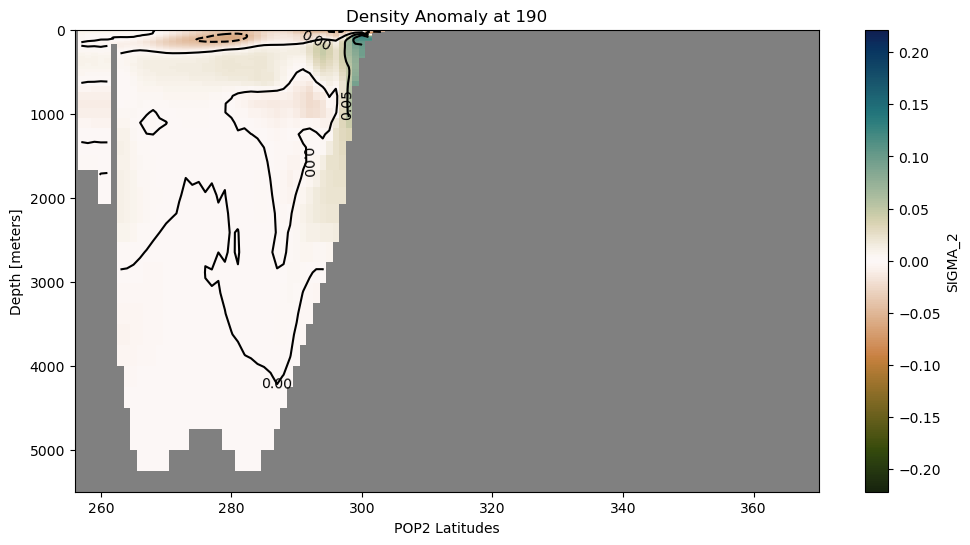

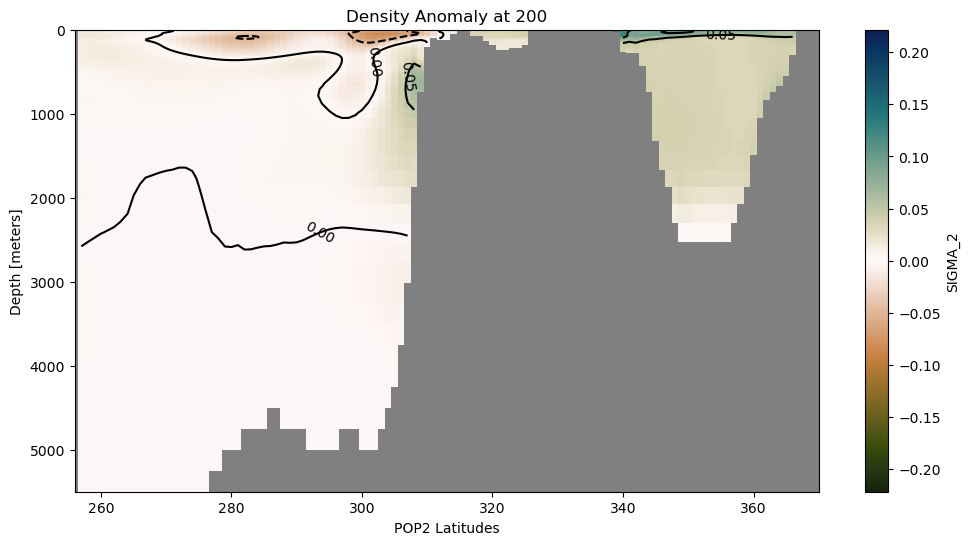

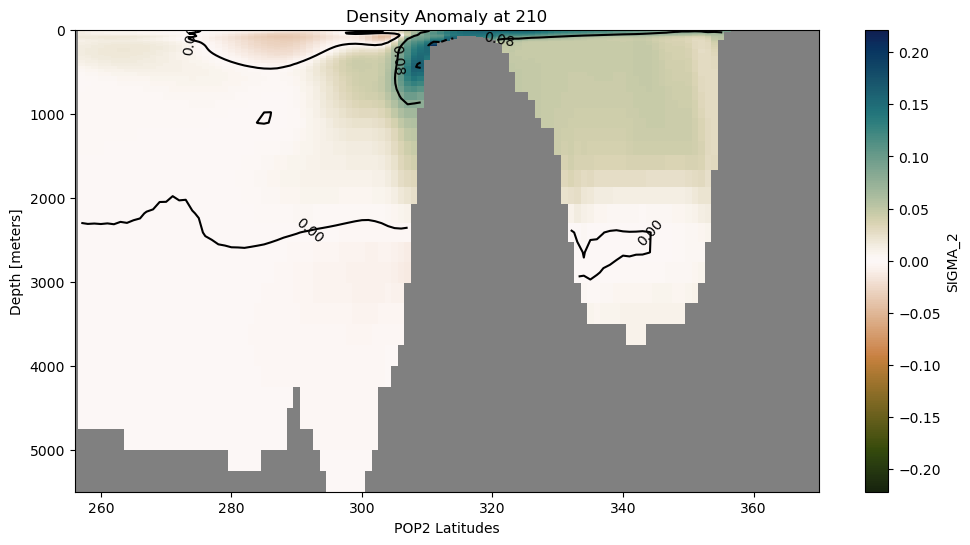

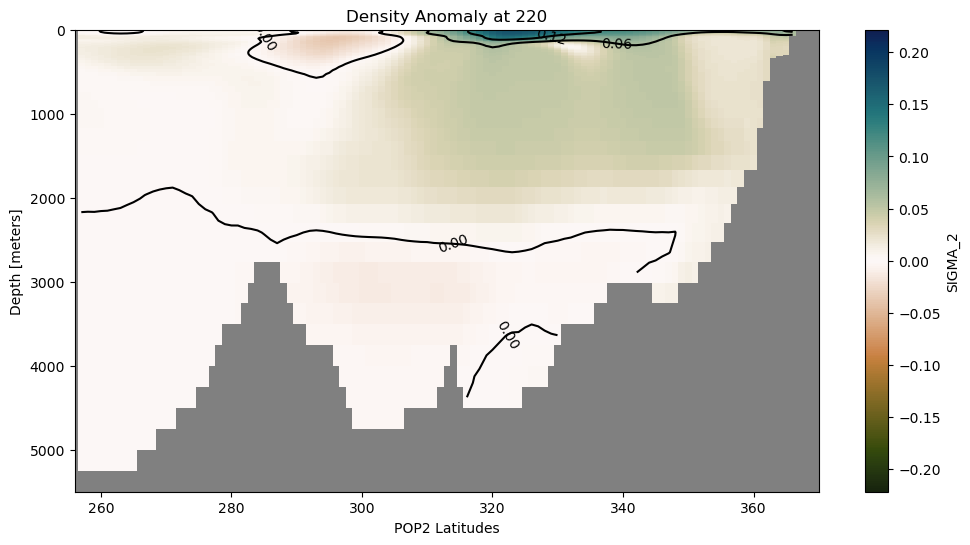

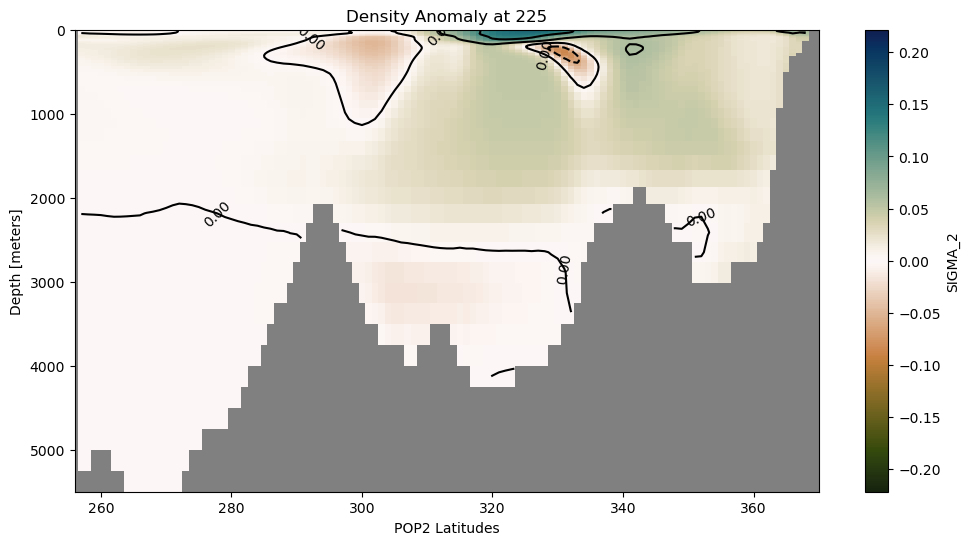

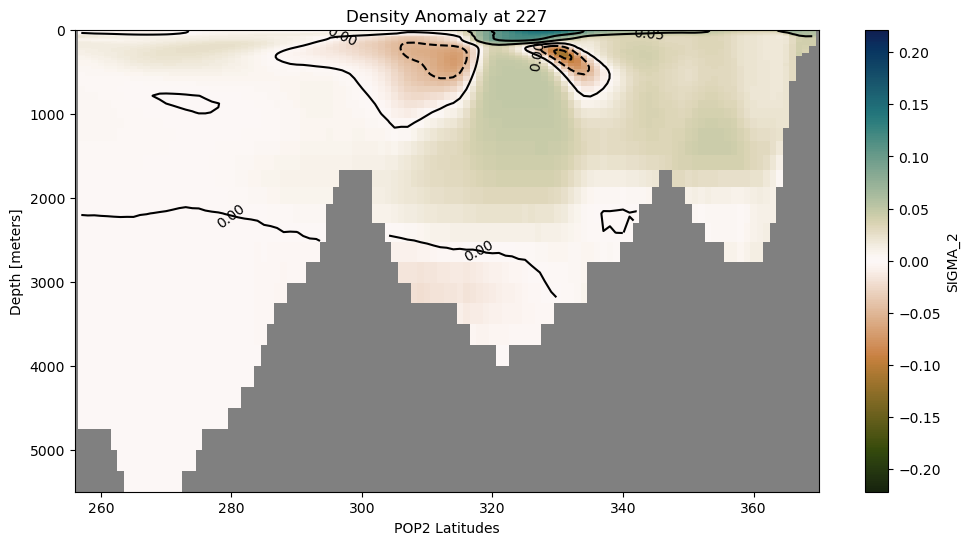

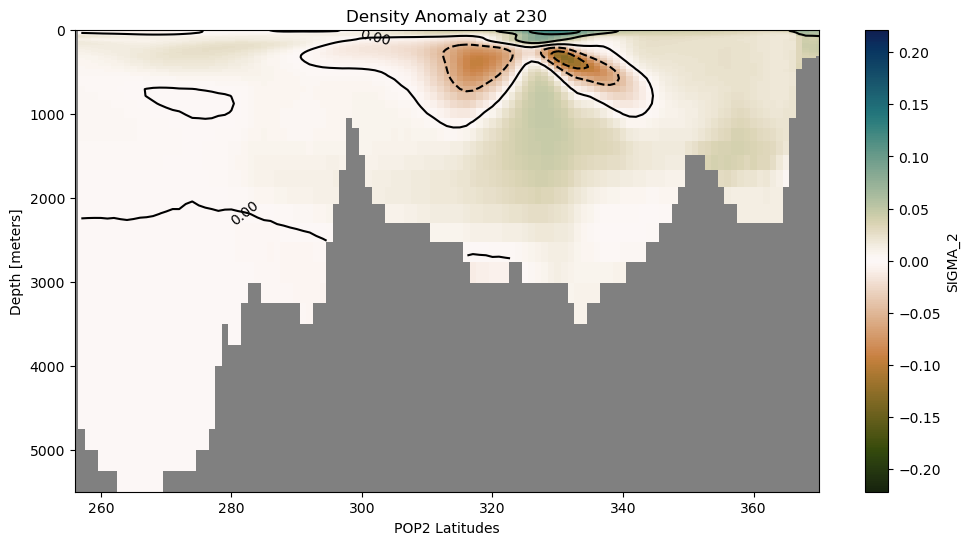

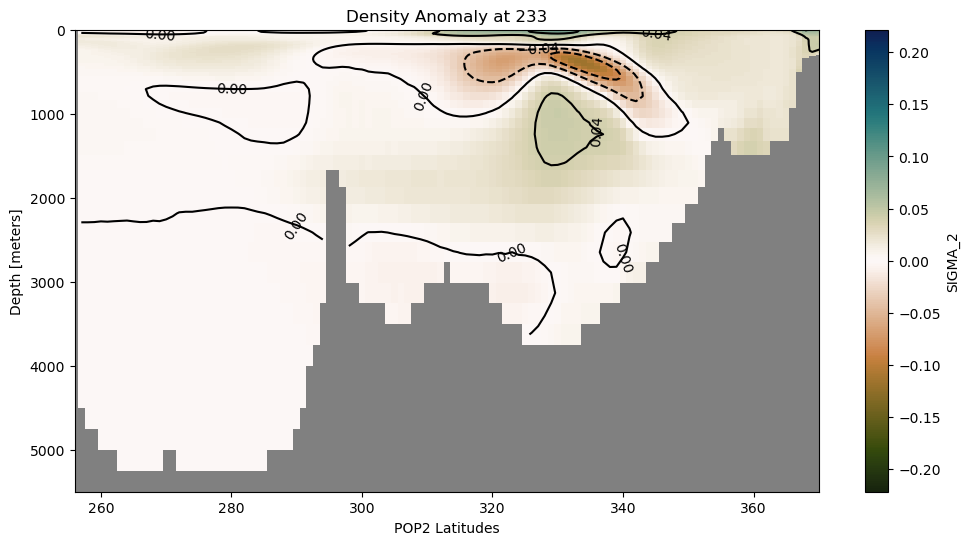

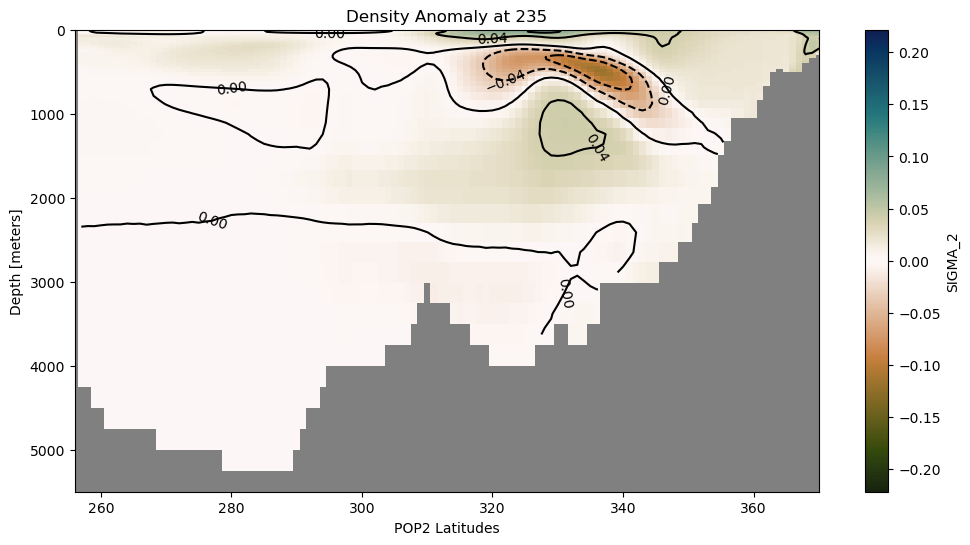

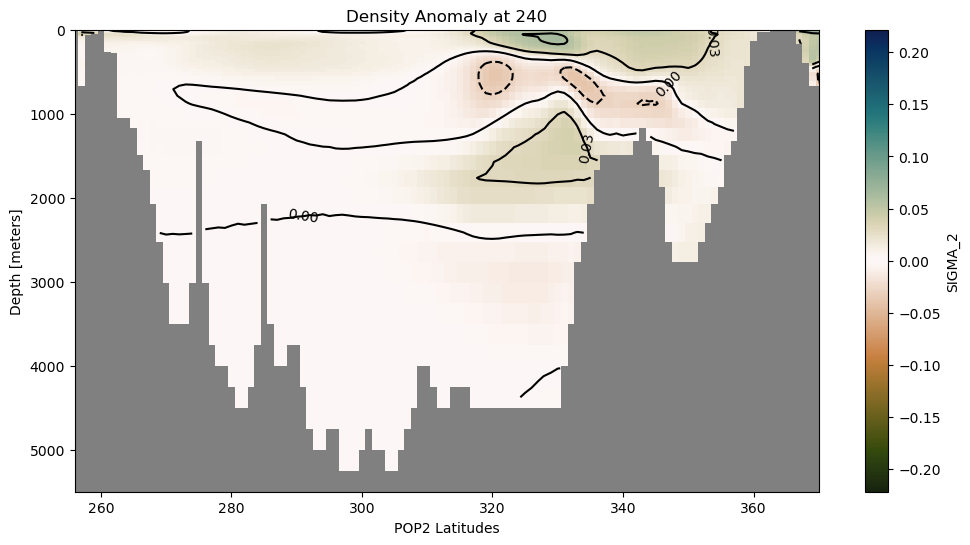

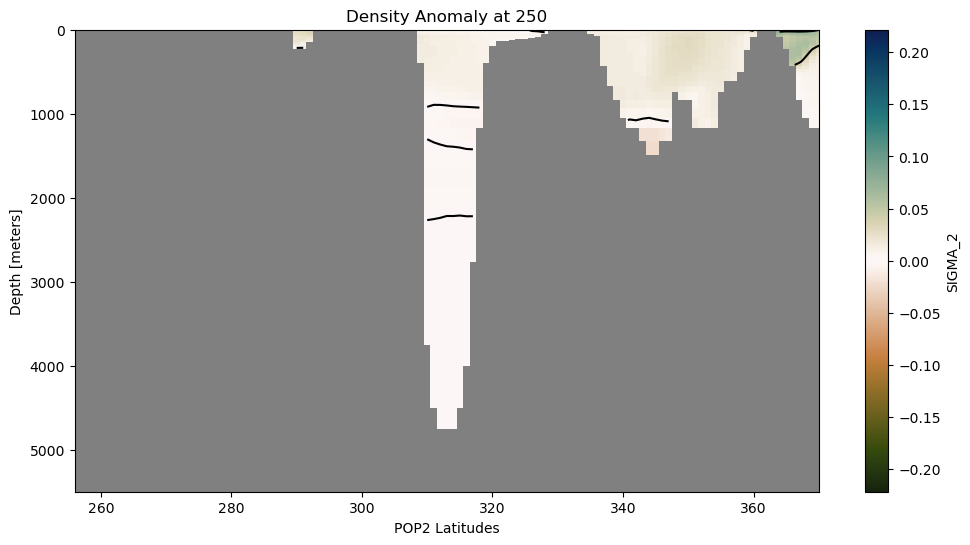

In [6]:
nlons = [190, 200, 210, 220, 225, 227, 230, 233, 235, 240, 250]

for nlon in nlons:
    field = difference_sigma.SIGMA_2.isel(nlon=nlon)

    plt.figure(figsize=(12, 6))
    lati_sigma_plot = field.plot(cmap=cmap,yincrease=False, vmin=vmin, vmax=vmax)
    contour = field.plot.contour(colors='k') 
    plt.clabel(contour, inline=False, fontsize=10)

    plt.xlim([256, 370])
    plt.ylabel('Depth [meters]')
    plt.xlabel('POP2 Latitudes')
    plt.title('Density Anomaly at '+str(nlon))

    plt.gca().invert_yaxis()
    new_y_labels = ['0','1000', '2000', '3000', '4000', '5000']
    plt.yticks([0,100000, 200000, 300000, 400000, 500000], labels=new_y_labels)

    #plt.show()
    plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'sigma_anomaly-'+str(nlon)+'.png', bbox_inches='tight', dpi=300)

# Plot average years

In [7]:
files = sorted(glob.glob('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/*.nc'))

In [65]:
variables = ['TEMP', 'SALT', 'SIGMA_2', 'HMXL', 'SHF', 'SSH']
labels = [r'Temperature Anomaly $\Delta T$ [$^{\circ} C$]', r'Haline Anomaly $Delta S$ [$\frac{g}{kg}$]', 
          r'Potential Density Anomaly $\Delta\sigma_2$ [$\frac{kg}{m^3} -1000$]', r'March Mixed Layer Depth Anomaly $\Delta h$ [$m$]',
          r'Total Surface Heat Flux Anomaly $\Delta Q_s$ [$\frac{W}{m^2}$]', r'Sea Surface Height Anomaly $\Delta \eta$ [$m$]']

cmaps = [cmo.balance, cmo.delta, cmo.tarn, cmo.diff, cmo.curl, cmo.diff]

for var in variables:

    var_years = []
    for t in range(60):
        var_year = []
        for i in range(len(files)):
            try:
                ds = xr.open_dataset(files[i])
            except ValueError as e:
                continue

            ds_file = ds[var].isel(time=t)
            var_year.append(ds_file)

        ds_comp = xr.concat(var_year, dim='file').mean(dim='file')
        var_years.append(ds_comp)

    ds_var_annual = xr.concat(var_years, dim='time')
    
    break

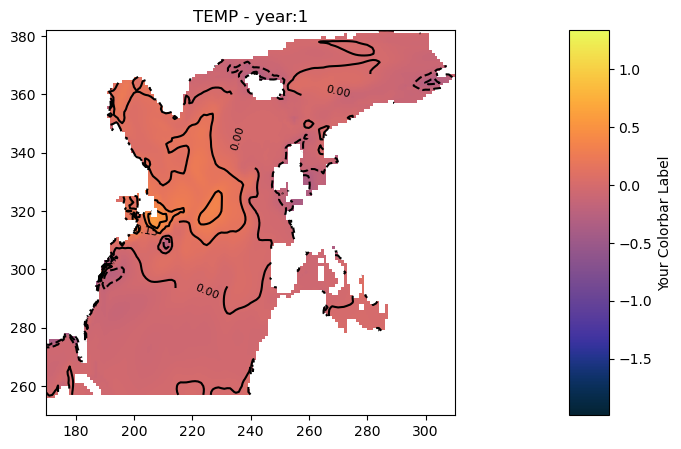

In [63]:
def plot_var_frame(time_step):
    data = ds.isel(time=start + time_step)
    ax1.cla()
    im = ax1.imshow(data, cmap=cmo.thermal, vmin=t_min, vmax=t_max)  ## TEMPERATURE colormap
    contour = ax1.contour(data, colors='k')
    ax1.clabel(contour, inline=True, fontsize=8)
    ax1.set_xlim([170, 310])
    ax1.set_ylim([250, 382])
    ax1.set_title(var+f' - year:{1+time_step}')

# Set up initial data
start = 1
ds = ds_var_annual.sel(z_t=slice(5.0000000e+02, 8.7882523e+04)).mean('z_t') - ds_var_annual.isel(time=0).sel(z_t=slice(5.0000000e+02, 8.7882523e+04)).mean('z_t')
t_min, t_max = ds.min().values, ds.max().values

# create figure and set up layout of subplots
fig = plt.figure(figsize=(8, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[13, 1])

# main subplot for animation
ax1 = plt.subplot(gs[0])

# Acolorbar subplot 
cax = plt.subplot(gs[1])
num_time_steps = 59
ani = animation.FuncAnimation(fig, plot_var_frame, frames=num_time_steps, interval=800)

# set colorbar
sm = plt.cm.ScalarMappable(cmap=cmo.thermal, norm=plt.Normalize(vmin=t_min, vmax=t_max))
sm.set_array([])  # empty array for now
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Your Colorbar Label')

# Save animation
ani.save(os.path.expanduser('~/phase1_CONDA/results/') + 'test.gif', writer='pillow', fps=3)


# Plot average decades

In [41]:
# Retrieve colorbar label from the xarray dataset
colorbar_label = ds.attrs.get('long_name')
colorbar_label

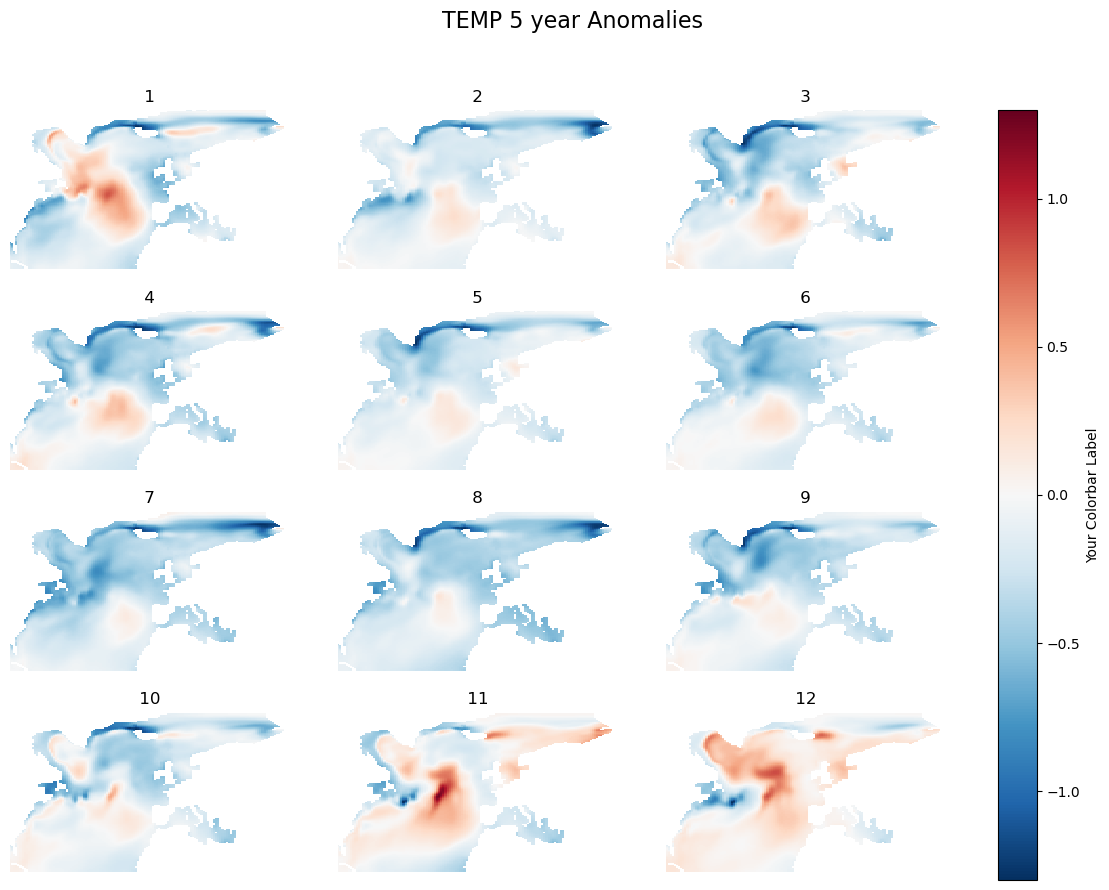

In [42]:
ds = ds_var_annual.isel(z_t=0) - ds_var_annual.isel(z_t=0, time=0)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Set common xlim and ylim for all plots
common_xlim = (180, 310)
common_ylim = (250, 380)

# Loop through the subplots and plot the data
for i, ax in enumerate(axes.flatten()):
    # Plot data without colorbar
    plot = ds.isel(time=range(i * 5, i * 5 + 5)).mean('time').plot(ax=ax, add_colorbar=False)
    ax.set_axis_off()

    # Set xlim and ylim
    ax.set_xlim(common_xlim)
    ax.set_ylim(common_ylim)

    ax.set_title(f" {i+1}")

# Add a single colorbar for all plots outside the loop
cbar = fig.colorbar(plot, ax=axes, orientation='vertical', label='Your Colorbar Label')

fig.suptitle(var+' -  5 year Anomalies', fontsize=16)

plt.show()

# Plot average 5 years@

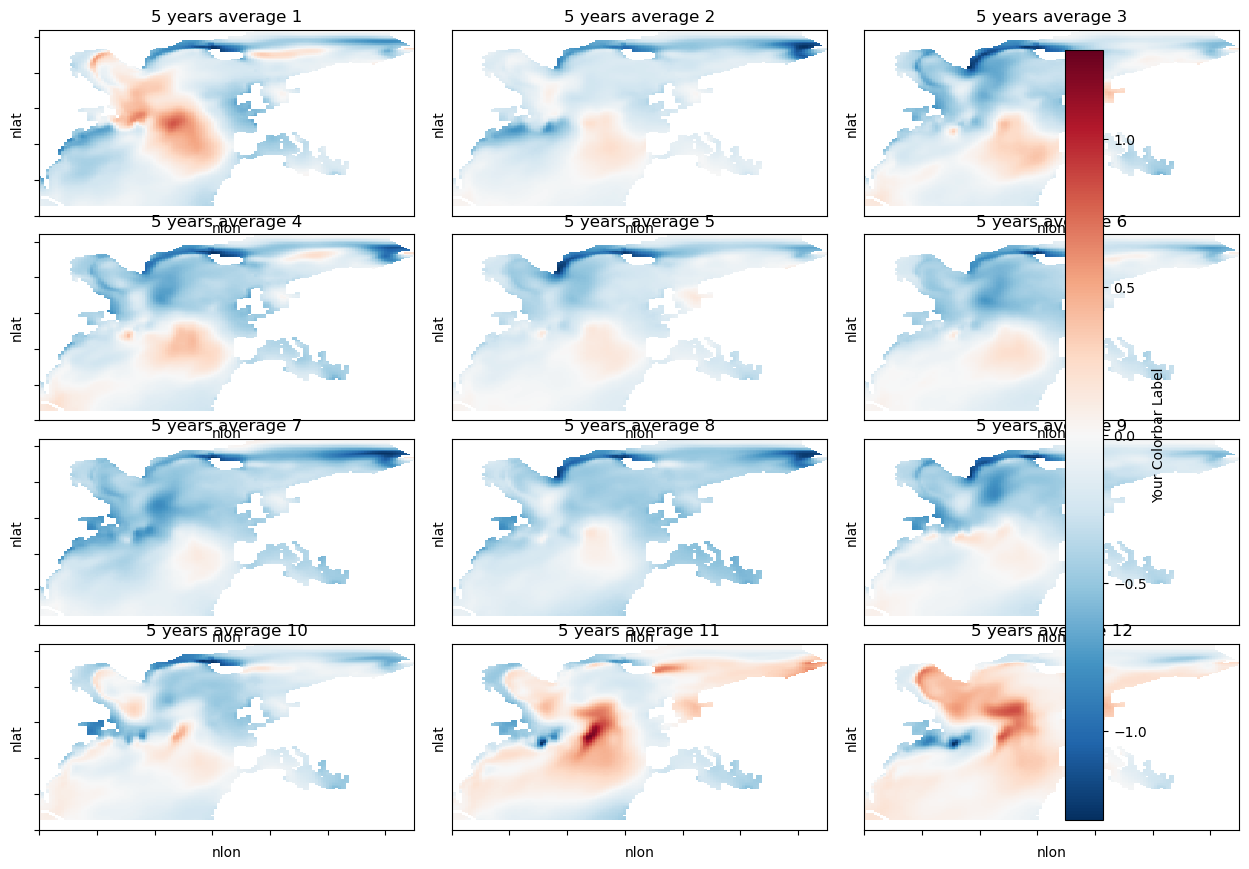

In [33]:
# Your existing code
ds = ds_var_annual.isel(z_t=0) - ds_var_annual.isel(z_t=0, time=0)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10), sharex=True, sharey=True)

# Set common xlim and ylim for all plots
common_xlim = (180, 310)
common_ylim = (250, 380)

# Loop through the subplots and plot the data
for i, ax in enumerate(axes.flatten()):
    # Plot data without colorbar
    plot = ds.isel(time=range(i * 5, i * 5 + 5)).mean('time').plot(ax=ax, add_colorbar=False)

    # Set xlim and ylim
    ax.set_xlim(common_xlim)
    ax.set_ylim(common_ylim)

    ax.set_title(f"5 years average {i+1}")

    # Remove ticks and labels from inner plots
    if i % 3 != 0:
        ax.set_yticklabels([])  # Hide y-axis tick labels
        ax.tick_params(left=False)
    if i < 9:
        ax.set_xticklabels([])  # Hide x-axis tick labels
        ax.tick_params(bottom=False)

# Add a single colorbar for all plots outside the loop
cbar = fig.colorbar(plot, ax=axes, orientation='vertical', label='Your Colorbar Label')

# Adjust layout manually
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.1, hspace=0.1)

plt.show()